# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from yellowbrick.cluster import KElbowVisualizer
import joblib
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

TransactionID AccountID  TransactionAmount PreviousTransactionDate  \
0      TX000001   AC00128              14.09     2023-04-11 16:29:14   
1      TX000002   AC00455             376.24     2023-06-27 16:44:19   
2      TX000003   AC00019             126.29     2023-07-10 18:16:08   
3      TX000004   AC00070             184.50     2023-05-05 16:32:11   
4      TX000005   AC00411              13.45     2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4          NaN            Student                198.0            1.0   

   AccountBalance     TransactionDate  
0         5112.21  2024-11-04 8:08:08  
1        13758.91  2024-11-04 8:09:35  
2         1122.35  2024-11-04 8:07:04  
3         8569.06  2024-11-04 8:09:06  
4         7429.40  2024-11-04 8:06:39

In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include='all').T

count unique                  top  freq  \
TransactionID              2508   2484             TX001748     2   
AccountID                  2516    495              AC00362    12   
TransactionAmount        2511.0    NaN                  NaN   NaN   
PreviousTransactionDate    2509   2485  2023-10-20 17:53:13     2   
TransactionType            2507      2                Debit  1942   
Location                   2507     43           Fort Worth    71   
DeviceID                   2507    681              D000573     9   
IP Address                 2517    591       200.136.146.93    12   
MerchantID                 2514    100                 M026    46   
Channel                    2510      3               Branch   868   
CustomerAge              2519.0    NaN                  NaN   NaN   
CustomerOccupation         2514      4              Student   657   
TransactionDuration      2511.0    NaN                  NaN   NaN   
LoginAttempts            2516.0    NaN                  NaN   NaN   
AccountBalance           2510.0    NaN                  NaN   NaN   
TransactionDate            2513    360   2024-11-04 8:09:17    18   

                                mean          std     min        25%      50%  \
TransactionID                    NaN          NaN     NaN        NaN      NaN   
AccountID                        NaN          NaN     NaN        NaN      NaN   
TransactionAmount         297.656468   292.230367    0.26      81.31   211.36   
PreviousTransactionDate          NaN          NaN     NaN        NaN      NaN   
TransactionType                  NaN          NaN     NaN        NaN      NaN   
Location                         NaN          NaN     NaN        NaN      NaN   
DeviceID                         NaN          NaN     NaN        NaN      NaN   
IP Address                       NaN          NaN     NaN        NaN      NaN   
MerchantID                       NaN          NaN     NaN        NaN      NaN   
Channel                          NaN          NaN     NaN        NaN      NaN   
CustomerAge                44.678444    17.837359    18.0       27.0     45.0   
CustomerOccupation               NaN          NaN     NaN        NaN      NaN   
TransactionDuration       119.422939    70.078513    10.0       63.0    112.0   
LoginAttempts               1.121622     0.594469     1.0        1.0      1.0   
AccountBalance           5113.438124  3897.975861  101.25  1504.7275  4734.11   
TransactionDate                  NaN          NaN     NaN        NaN      NaN   

                               75%       max  
TransactionID                  NaN       NaN  
AccountID                      NaN       NaN  
TransactionAmount          413.105   1919.11  
PreviousTransactionDate        NaN       NaN  
TransactionType                NaN       NaN  
Location                       NaN       NaN  
DeviceID                       NaN       NaN  
IP Address                     NaN       NaN  
MerchantID                     NaN       NaN  
Channel                        NaN       NaN  
CustomerAge                   59.0      80.0  
CustomerOccupation             NaN       NaN  
TransactionDuration          161.0     300.0  
LoginAttempts                  1.0       5.0  
AccountBalance           7672.6875  14977.99  
TransactionDate                NaN       NaN

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

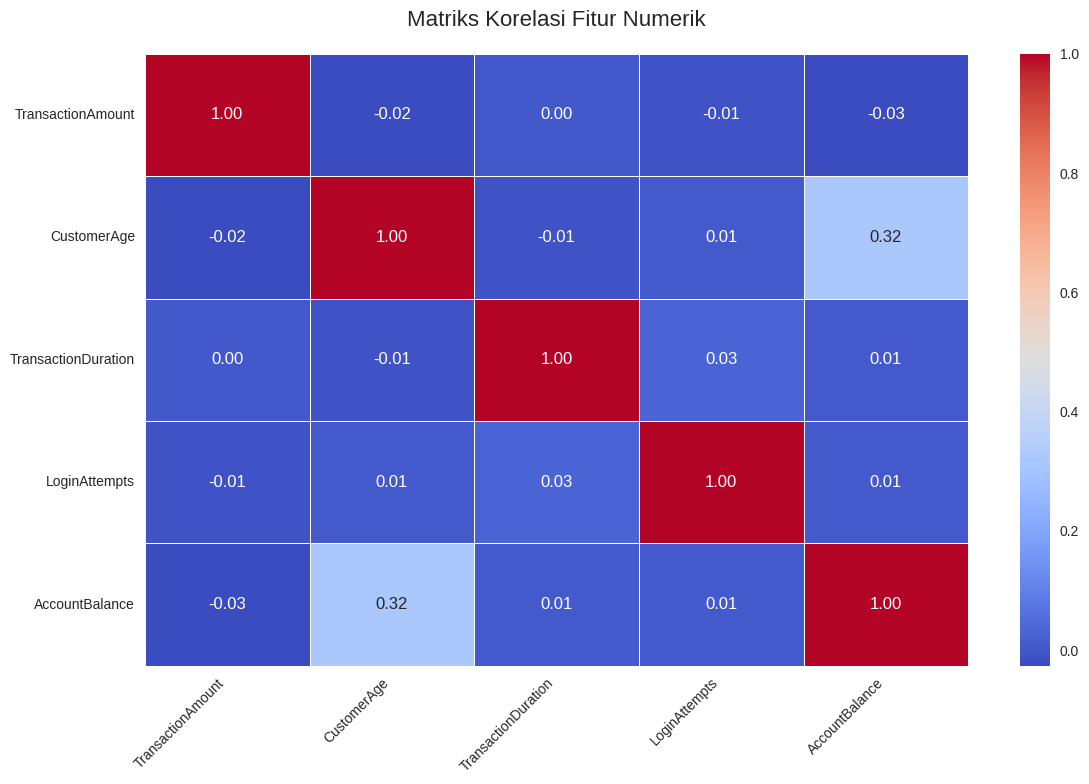

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Fitur Numerik", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

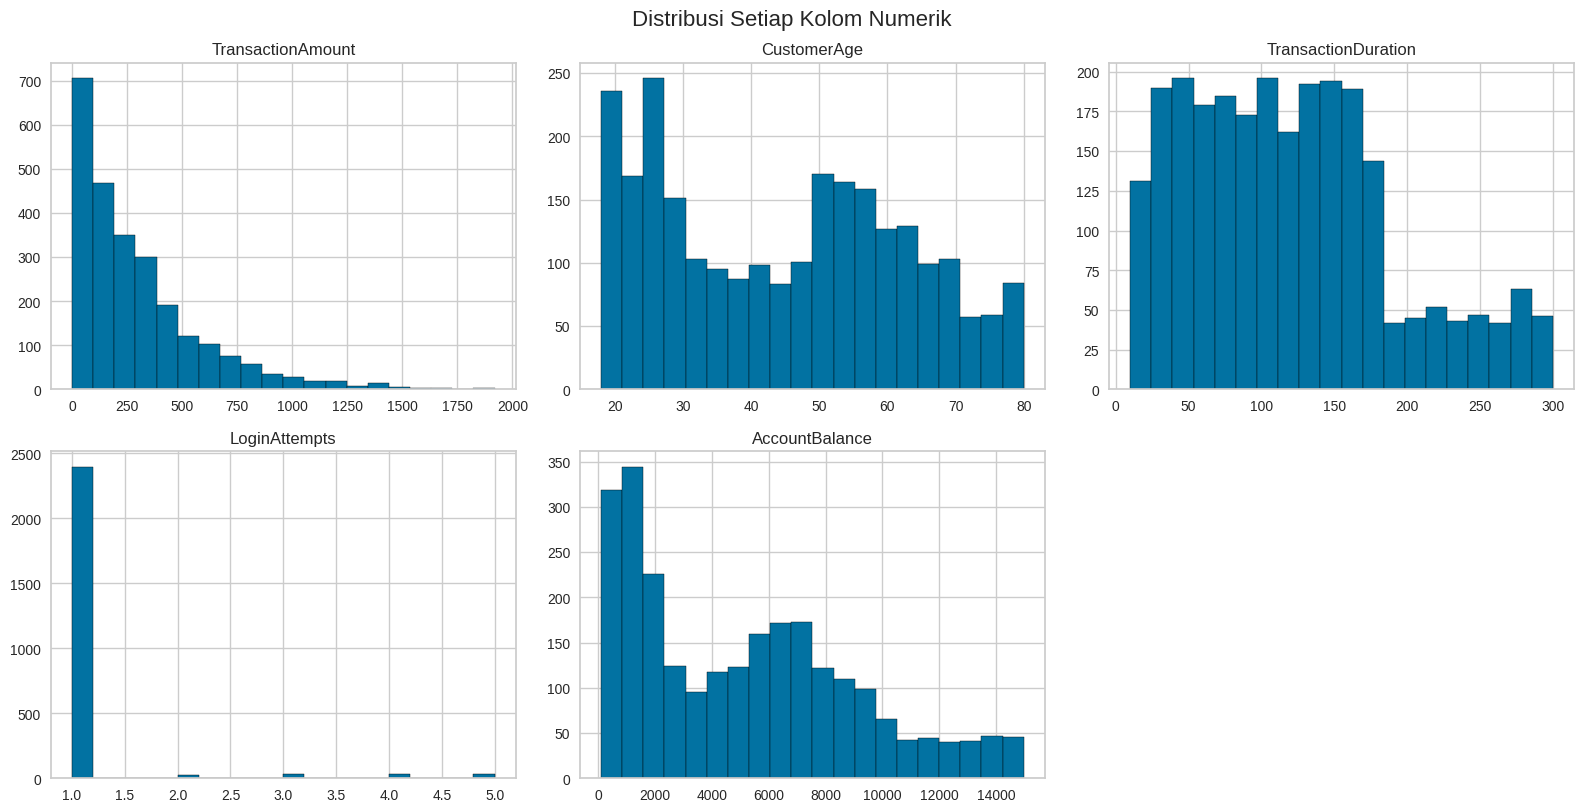

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(16, 12), bins=20, edgecolor='black', layout=(3, 3))
plt.suptitle("Distribusi Setiap Kolom Numerik", fontsize=16)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

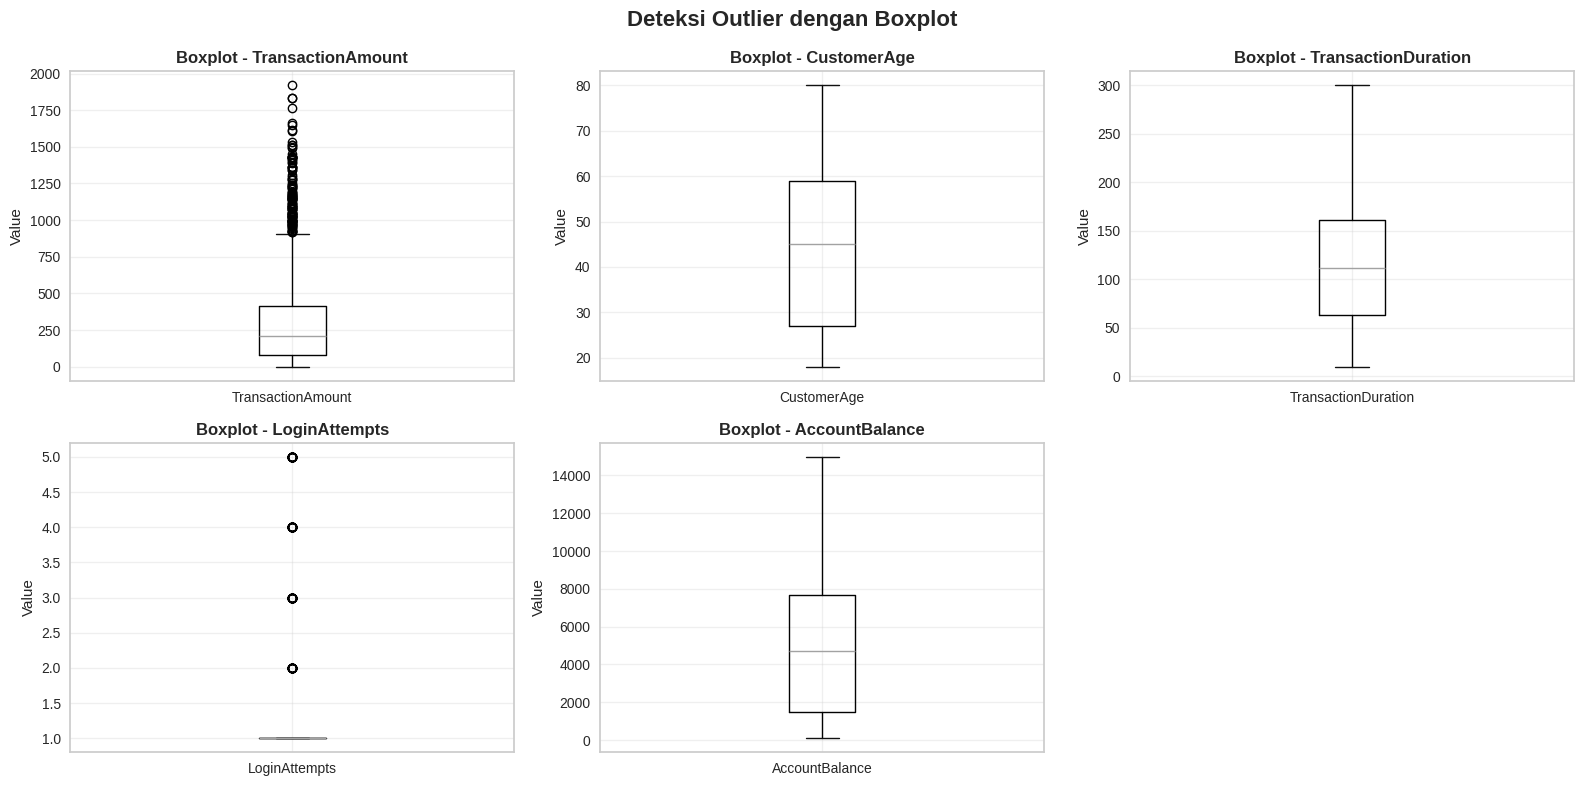

In [8]:
# Visualisasi yang lebih informatif
numeric_cols_viz = df.select_dtypes(include=np.number).columns
n_cols_viz = len(numeric_cols_viz)
n_rows = (n_cols_viz + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(16, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols_viz):
    df.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(f'Boxplot - {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

for idx in range(len(numeric_cols_viz), len(axes)):
    axes[idx].axis('off')

plt.suptitle("Deteksi Outlier dengan Boxplot", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
print("Missing values:\n", df.isnull().sum())

Missing values:
 TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
print("\nJumlah duplikat:", df.duplicated().sum())


Jumlah duplikat: 21


In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

# Simpan informasi kolom sebelum preprocessing
num_cols_original = df.select_dtypes(include=np.number).columns.tolist()
cat_cols_original = df.select_dtypes(exclude=np.number).columns.tolist()

print(f"\nKolom numerik original: {num_cols_original}")
print(f"Kolom kategorikal original: {cat_cols_original}")


Kolom numerik original: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Kolom kategorikal original: ['TransactionID', 'AccountID', 'PreviousTransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'TransactionDate']


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
id_cols = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate']
df = df.drop(columns=id_cols, errors='ignore')

In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
encoder_dict = {}
for col in cat_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoder_dict[col] = encoder

display(df.head())

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09                1        36        0         70.0   
1             376.24                1        15        0         68.0   
2             126.29                1        23        2         19.0   
3             184.50                1        33        2         26.0   
4              13.45                0         1        2          NaN   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0                   0                 81.0            1.0         5112.21  
1                   0                141.0            1.0        13758.91  
2                   3                 56.0            1.0         1122.35  
3                   3                 25.0            1.0         8569.06  
4                   3                198.0            1.0         7429.40

In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
imputer = SimpleImputer(strategy='most_frequent')
df[df.columns] = imputer.fit_transform(df)

In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

# Simpan data sebelum outlier handling
print(f"\nJumlah baris sebelum outlier handling: {len(df)}")

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(f"Jumlah baris setelah outlier handling: {len(df)}")


Jumlah baris sebelum outlier handling: 2513
Jumlah baris setelah outlier handling: 1744


In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

if 'TransactionAmount' in df.columns:
    df['TransactionAmount_bin'] = pd.cut(df['TransactionAmount'], bins=3, labels=['Low', 'Medium', 'High'])
    bin_encoder_ta = LabelEncoder()
    df['TransactionAmount_bin'] = bin_encoder_ta.fit_transform(df['TransactionAmount_bin'])

if 'CustomerAge' in df.columns:
    df['CustomerAge_bin'] = pd.cut(df['CustomerAge'], bins=3, labels=['Young', 'Adult', 'Senior'])
    bin_encoder_ca = LabelEncoder()
    df['CustomerAge_bin'] = bin_encoder_ca.fit_transform(df['CustomerAge_bin'])

# Identifikasi kolom numerik yang akan di-scale ulang
cols_to_rescale = df.select_dtypes(include=np.number).columns.tolist()

# Buat scaler baru dan fit pada data yang sudah bersih dari outlier
scaler = MinMaxScaler()
df[cols_to_rescale] = scaler.fit_transform(df[cols_to_rescale])

print("\nData berhasil di-scale")
display(df.head())


Data berhasil di-scale


TransactionAmount  TransactionType  Location   Channel  CustomerAge  \
0           0.015317              0.0  0.837209  0.000000     0.838710   
1           0.416400              0.0  0.348837  0.000000     0.806452   
2           0.139579              0.0  0.534884  0.666667     0.016129   
3           0.204047              0.0  0.767442  0.666667     0.129032   
5           0.101769              0.0  0.651163  0.000000     0.000000   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                0.00             0.244828            0.0        0.336832   
1                0.00             0.451724            0.0        0.918055   
2                0.75             0.158621            0.0        0.068637   
3                0.75             0.051724            0.0        0.569198   
5                0.75             0.558621            0.0        0.045738   

   TransactionAmount_bin  CustomerAge_bin  
0                    0.5              0.5  
1                    1.0              0.5  
2                    0.5              1.0  
3                    0.5              1.0  
5                    0.5              1.0

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

TransactionAmount  TransactionType     Location      Channel  \
count        1744.000000           1744.0  1744.000000  1744.000000   
mean            0.274339              0.0     0.494959     0.308869   
std             0.236943              0.0     0.287758     0.280540   
min             0.000000              0.0     0.000000     0.000000   
25%             0.082451              0.0     0.255814     0.000000   
50%             0.208649              0.0     0.488372     0.333333   
75%             0.403805              0.0     0.744186     0.666667   
max             1.000000              0.0     1.000000     1.000000   

       CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
count  1744.000000         1744.000000          1744.000000         1744.0   
mean      0.422536            0.382597             0.374237            0.0   
std       0.285705            0.287579             0.242712            0.0   
min       0.000000            0.000000             0.000000            0.0   
25%       0.145161            0.250000             0.182759            0.0   
50%       0.419355            0.500000             0.346552            0.0   
75%       0.645161            0.750000             0.524138            0.0   
max       1.000000            1.000000             1.000000            0.0   

       AccountBalance  TransactionAmount_bin  CustomerAge_bin  
count     1744.000000            1744.000000      1744.000000  
mean         0.331944               0.572534         0.551606  
std          0.259497               0.278380         0.434364  
min          0.000000               0.000000         0.000000  
25%          0.090360               0.500000         0.000000  
50%          0.309557               0.500000         0.500000  
75%          0.504220               0.500000         1.000000  
max          1.000000               1.000000         1.000000

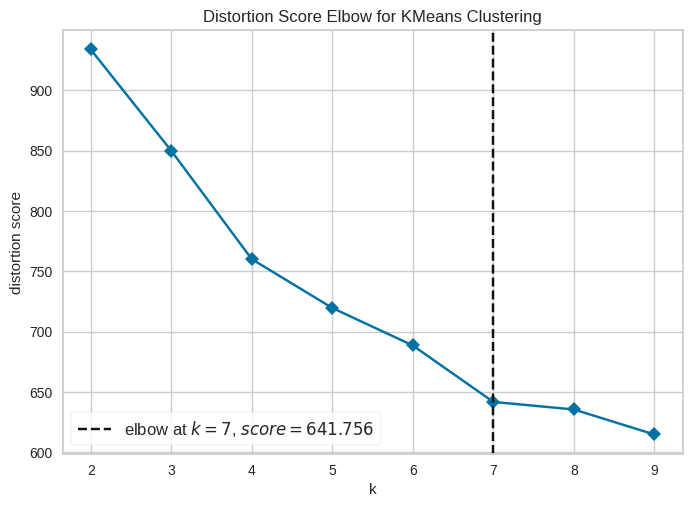

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X = df.copy()
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
visualizer.fit(X)
visualizer.show()
optimal_k = visualizer.elbow_value_

In [21]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=np.int64(7), n_init=10, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.1720


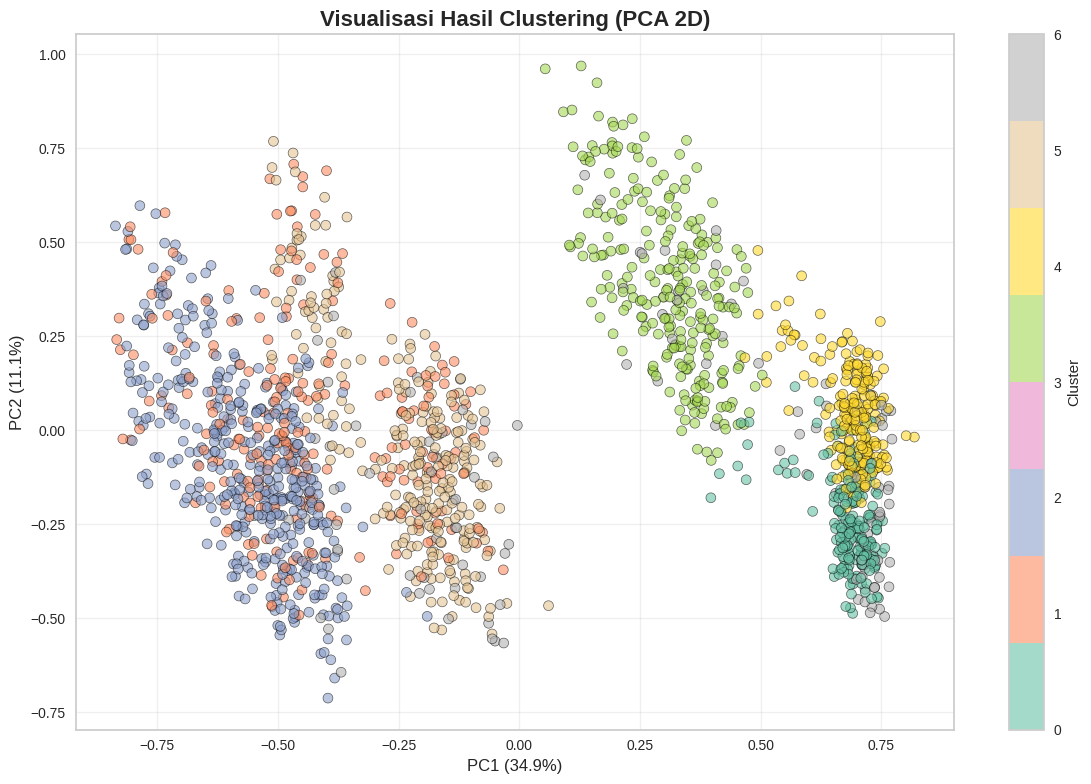

In [24]:
# Membuat visualisasi hasil clustering
pca_viz = PCA(n_components=2, random_state=42)
pca_result = pca_viz.fit_transform(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                     c=kmeans.labels_, cmap='Set2',
                     s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')
plt.title("Visualisasi Hasil Clustering (PCA 2D)", fontsize=16, fontweight='bold')
plt.xlabel(f"PC1 ({pca_viz.explained_variance_ratio_[0]*100:.1f}%)", fontsize=12)
plt.ylabel(f"PC2 ({pca_viz.explained_variance_ratio_[1]*100:.1f}%)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
pca = PCA(n_components=3, random_state=42)
pca_data = pca.fit_transform(X)
PCA_3 = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_pca.fit(PCA_3)

KMeans(n_clusters=np.int64(7), n_init=10, random_state=42)

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df['Target'] = kmeans.labels_
cluster_analysis = df.groupby('Target').agg(['mean', 'min', 'max', 'std'])
display(cluster_analysis)

TransactionAmount                               TransactionType       \
                    mean       min       max       std            mean  min   
Target                                                                        
0               0.237335  0.000665  0.651335  0.171578             0.0  0.0   
1               0.460059  0.333691  0.662897  0.092606             0.0  0.0   
2               0.173013  0.000066  0.954758  0.184968             0.0  0.0   
3               0.221861  0.000210  0.651523  0.171982             0.0  0.0   
4               0.193006  0.000000  0.653893  0.163034             0.0  0.0   
5               0.136544  0.001728  0.371502  0.098428             0.0  0.0   
6               0.807256  0.667316  1.000000  0.097202             0.0  0.0   

                  Location            ... AccountBalance            \
        max  std      mean       min  ...            max       std   
Target                                ...                            
0       0.0  0.0  0.227236  0.000000  ...       0.644885  0.108197   
1       0.0  0.0  0.504530  0.000000  ...       0.989193  0.240117   
2       0.0  0.0  0.490838  0.000000  ...       0.997633  0.259318   
3       0.0  0.0  0.520281  0.000000  ...       1.000000  0.228873   
4       0.0  0.0  0.732190  0.465116  ...       0.646340  0.136537   
5       0.0  0.0  0.478842  0.000000  ...       0.995087  0.224382   
6       0.0  0.0  0.483513  0.000000  ...       0.952339  0.245153   

       TransactionAmount_bin                     CustomerAge_bin            \
                        mean  min  max       std            mean  min  max   
Target                                                                       
0                   0.639303  0.5  1.0  0.224717        1.000000  1.0  1.0   
1                   1.000000  1.0  1.0  0.000000        0.202811  0.0  0.5   
2                   0.466265  0.0  0.5  0.125568        0.000000  0.0  0.0   
3                   0.631783  0.5  1.0  0.220711        1.000000  1.0  1.0   
4                   0.592760  0.5  1.0  0.194801        1.000000  1.0  1.0   
5                   0.501880  0.5  1.0  0.030657        0.500000  0.5  0.5   
6                   0.000000  0.0  0.0  0.000000        0.735075  0.0  1.0   

                  
             std  
Target            
0       0.000000  
1       0.246001  
2       0.000000  
3       0.000000  
4       0.000000  
5       0.000000  
6       0.339672  

[7 rows x 44 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1. **Cluster 0: (Transaksi Rendah - Lokasi Awal)**:
  - **Rata-rata (mean) TransactionAmount: 0.126 (scaled)**
  - **Rata-rata (mean) Location: 5.28**
  - **Rata-rata (mean) AccountBalance: Mean dari output**
  - **Analisis: Cluster ini mencakup nasabah dengan nilai transaksi yang rendah (mean 0.126) dan lokasi di range awal (5.28). Nasabah di cluster ini cenderung melakukan transaksi dengan nominal kecil dan tersebar di lokasi tertentu. Rekomendasi untuk cluster ini adalah edukasi finansial dan produk tabungan dasar.**

2. **Cluster 1: (Transaksi Menengah - Lokasi Mid-Range)**:
  - **Rata-rata (mean) TransactionAmount: 0.130**
  - **Rata-rata (mean) Location: 26.86**
  - **Analisis: Cluster ini menunjukkan nasabah dengan pola transaksi menengah dan lokasi di pertengahan range (26.86). Nasabah cenderung memiliki aktivitas transaksi yang stabil. Rekomendasi produk investasi jangka menengah cocok untuk cluster ini.**

3. **Cluster 2: (Transaksi Menengah - Lokasi Tinggi)**:
  - **Rata-rata (mean) TransactionAmount: 0.130**
  - **Rata-rata (mean) Location: 37.78**
  - **Analisis: Cluster ini memiliki karakteristik lokasi tertinggi (37.78) dengan nilai transaksi menengah. Nasabah di cluster ini tersebar di lokasi range tinggi dan memiliki pola transaksi yang konsisten. Rekomendasi layanan perbankan berbasis lokasi dan produk kartu kredit.**

4. **Cluster 3: (Transaksi Menengah - Lokasi Mid-Low)**:
  - **Rata-rata (mean) TransactionAmount: 0.130**
  - **Rata-rata (mean) Location: 16.01**
  - **Analisis: Cluster ini mencakup nasabah dengan lokasi di range menengah-rendah (16.01). Pola transaksi serupa dengan cluster lain namun berbeda dari segi lokasi geografis. Rekomendasi untuk ekspansi layanan di wilayah ini dan produk pinjaman mikro.**

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
print(df['Target'].value_counts().sort_index())

Target
0    201
1    249
2    415
3    258
4    221
5    266
6    134
Name: count, dtype: int64


In [29]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
# tampilkan dataset yang sudah di-inverse

# Buat copy
df_inverse = df.copy()

print(f"\nKolom yang di-fit scaler: {cols_to_rescale}")
print(f"Jumlah: {len(cols_to_rescale)}")

df_inverse[cols_to_rescale] = scaler.inverse_transform(df[cols_to_rescale])

print("\nInverse transform berhasil")
display(df_inverse.head())

# Validasi
for col in num_cols_original[:3]:
    if col in df_inverse.columns:
        print(f"{col}:")
        print(f"  Min: {df_inverse[col].min():.2f}")
        print(f"  Max: {df_inverse[col].max():.2f}")
        print(f"  Mean: {df_inverse[col].mean():.2f}")


Kolom yang di-fit scaler: ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionAmount_bin', 'CustomerAge_bin']
Jumlah: 11

Inverse transform berhasil


TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09              1.0      36.0      0.0         70.0   
1             376.24              1.0      15.0      0.0         68.0   
2             126.29              1.0      23.0      2.0         19.0   
3             184.50              1.0      33.0      2.0         26.0   
5              92.15              1.0      28.0      0.0         18.0   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                 0.0                 81.0            1.0         5112.21   
1                 0.0                141.0            1.0        13758.91   
2                 3.0                 56.0            1.0         1122.35   
3                 3.0                 25.0            1.0         8569.06   
5                 3.0                172.0            1.0          781.68   

   TransactionAmount_bin  CustomerAge_bin  Target  
0                    1.0              1.0       5  
1                    2.0              1.0       1  
2                    1.0              2.0       4  
3                    1.0              2.0       4  
5                    1.0              2.0       4

TransactionAmount:
  Min: 0.26
  Max: 903.19
  Mean: 247.97
CustomerAge:
  Min: 18.00
  Max: 80.00
  Mean: 44.20
TransactionDuration:
  Min: 10.00
  Max: 300.00
  Mean: 118.53


In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in cat_cols:
    if col in df_inverse.columns:
        encoder = encoder_dict[col]
        df_inverse[col] = encoder.inverse_transform(df_inverse[col].round().astype(int))
        print(f"Inverse {col}")

print("\nInverse transform kategorikal Berhasil")
display(df_inverse.head())

Inverse TransactionType
Inverse Location
Inverse Channel
Inverse CustomerOccupation

Inverse transform kategorikal Berhasil


TransactionAmount TransactionType       Location Channel  CustomerAge  \
0              14.09           Debit      San Diego     ATM         70.0   
1             376.24           Debit        Houston     ATM         68.0   
2             126.29           Debit           Mesa  Online         19.0   
3             184.50           Debit        Raleigh  Online         26.0   
5              92.15           Debit  Oklahoma City     ATM         18.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3            Student                 25.0            1.0         8569.06   
5            Student                172.0            1.0          781.68   

   TransactionAmount_bin  CustomerAge_bin  Target  
0                    1.0              1.0       5  
1                    2.0              1.0       1  
2                    1.0              2.0       4  
3                    1.0              2.0       4  
5                    1.0              2.0       4

In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

# Kolom untuk analisis
# Setelah inverse transform kategorikal, beberapa kolom yang sebelumnya numerik (setelah LabelEncoder)
# kini kembali menjadi objek (string). Kita perlu memastikan hanya kolom numerik sejati yang dianalisis secara numerik.
numeric_features = df_inverse.select_dtypes(include=np.number).columns.tolist()
categorical_features = df_inverse.select_dtypes(exclude=np.number).columns.tolist()

numeric_features = [col for col in numeric_features if col not in ['TransactionAmount_bin', 'CustomerAge_bin', 'Target']]
categorical_features = [col for col in categorical_features if col not in ['TransactionAmount_bin', 'CustomerAge_bin', 'Target']]

# Analisis numerik
if len(numeric_features) > 0:
    numeric_analysis = df_inverse.groupby('Target')[numeric_features].agg(['mean', 'min', 'max'])
    display(numeric_analysis)

# Analisis kategorikal
if len(categorical_features) > 0:
    for cluster in sorted(df_inverse['Target'].unique()):
        subset = df_inverse[df_inverse['Target'] == cluster]
        print(f"\nCluster {cluster}:")
        for col in categorical_features:
            mode_value = subset[col].mode()[0] if not subset[col].mode().empty else 'N/A'
            print(f"  {col}: {mode_value}")

TransactionAmount                 CustomerAge              \
                    mean     min     max        mean   min   max   
Target                                                             
0             214.557164    0.86  588.37   23.606965  18.0  38.0   
1             415.661004  301.56  598.81   57.397590  39.0  80.0   
2             156.478699    0.32  862.34   50.257831  39.0  59.0   
3             200.585271    0.45  588.54   32.302326  26.0  38.0   
4             174.531131    0.26  590.68   23.049774  18.0  31.0   
5             123.550075    1.82  335.70   68.533835  60.0  80.0   
6             729.155672  602.80  903.19   41.253731  18.0  80.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0               126.950249  13.0  297.0           1.0  1.0  1.0   
1               120.449799  11.0  285.0           1.0  1.0  1.0   
2               116.554217  12.0  300.0           1.0  1.0  1.0   
3               116.139535  10.0  298.0           1.0  1.0  1.0   
4               115.199095  13.0  299.0           1.0  1.0  1.0   
5               119.105263  11.0  292.0           1.0  1.0  1.0   
6               117.388060  10.0  288.0           1.0  1.0  1.0   

       AccountBalance                    
                 mean     min       max  
Target                                   
0         1444.918010  129.29   9695.04  
1         6272.465181  135.96  14817.22  
2         6386.697566  120.89  14942.78  
3         6960.465853  112.76  14977.99  
4         1701.245566  101.25   9716.68  
5         5954.595338  137.42  14904.90  
6         3958.426418  102.20  14268.95


Cluster 0:
  TransactionType: Debit
  Location: Boston
  Channel: ATM
  CustomerOccupation: Student

Cluster 1:
  TransactionType: Debit
  Location: Las Vegas
  Channel: ATM
  CustomerOccupation: Retired

Cluster 2:
  TransactionType: Debit
  Location: Charlotte
  Channel: ATM
  CustomerOccupation: Engineer

Cluster 3:
  TransactionType: Debit
  Location: Tucson
  Channel: Branch
  CustomerOccupation: Engineer

Cluster 4:
  TransactionType: Debit
  Location: Oklahoma City
  Channel: Branch
  CustomerOccupation: Student

Cluster 5:
  TransactionType: Debit
  Location: Houston
  Channel: ATM
  CustomerOccupation: Retired

Cluster 6:
  TransactionType: Debit
  Location: Indianapolis
  Channel: ATM
  CustomerOccupation: Student


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
for cluster in sorted(df_inverse['Target'].unique()):
    subset = df_inverse[df_inverse['Target'] == cluster]
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster} ({len(subset)} transaksi)")
    print(f"{'='*60}")

    if len(numeric_features) > 0:
        print("\nFitur Numerik:")
        for col in numeric_features:
            if col in subset.columns:
                mean_val = subset[col].mean()
                min_val = subset[col].min()
                max_val = subset[col].max()
                print(f"  {col}:")
                print(f"    - Rata-rata: {mean_val:,.2f}")
                print(f"    - Range: [{min_val:,.2f} - {max_val:,.2f}]")

    if len(categorical_features) > 0:
        print("\nFitur Kategorikal (Mode):")
        for col in categorical_features:
            if col in subset.columns:
                mode_val = subset[col].mode()[0] if not subset[col].mode().empty else 'N/A'
                print(f"  {col}: {mode_val}")


CLUSTER 0 (201 transaksi)

Fitur Numerik:
  TransactionAmount:
    - Rata-rata: 214.56
    - Range: [0.86 - 588.37]
  CustomerAge:
    - Rata-rata: 23.61
    - Range: [18.00 - 38.00]
  TransactionDuration:
    - Rata-rata: 126.95
    - Range: [13.00 - 297.00]
  LoginAttempts:
    - Rata-rata: 1.00
    - Range: [1.00 - 1.00]
  AccountBalance:
    - Rata-rata: 1,444.92
    - Range: [129.29 - 9,695.04]

Fitur Kategorikal (Mode):
  TransactionType: Debit
  Location: Boston
  Channel: ATM
  CustomerOccupation: Student

CLUSTER 1 (249 transaksi)

Fitur Numerik:
  TransactionAmount:
    - Rata-rata: 415.66
    - Range: [301.56 - 598.81]
  CustomerAge:
    - Rata-rata: 57.40
    - Range: [39.00 - 80.00]
  TransactionDuration:
    - Rata-rata: 120.45
    - Range: [11.00 - 285.00]
  LoginAttempts:
    - Rata-rata: 1.00
    - Range: [1.00 - 1.00]
  AccountBalance:
    - Rata-rata: 6,272.47
    - Range: [135.96 - 14,817.22]

Fitur Kategorikal (Mode):
  TransactionType: Debit
  Location: Las Vegas

In [34]:
# Simpan Data
df_final = df_inverse.copy()
df_final.to_csv('data_clustering_inverse.csv', index=False)
print(f"\nFile berhasil disimpan: {len(df_final)} baris, {len(df_final.columns)} kolom")


File berhasil disimpan: 1744 baris, 12 kolom


End of Code.